<a href="https://colab.research.google.com/github/sophia-moore/232-Final-Project/blob/main/code_lapl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import rbf_kernel

from scipy.sparse import csr_matrix,csgraph
from scipy.spatial.distance import cdist, pdist
from scipy.sparse.linalg import eigsh

import time
from tqdm import tqdm  # Add tqdm for progress bars

In [ ]:
# Load TRAIN CSV directly as numpy array

# BAG OF WORDS - NOT FEASABLE TOO LARGE
# X_train = pd.read_csv(r"C:\Users\gpapa\OneDrive\My Life\Education\2025 YALE MMS\Term_4S\T4_E_Adv_Lin_Algebra_p2\final_project\bow_train_matrix.csv")

# GLOVE SIMPLE AVG
X_train = pd.read_csv(
    r"C:\Users\gpapa\OneDrive\My Life\Education\2025 YALE MMS\Term_4S\T4_E_Adv_Lin_Algebra_p2\final_project\glove_train_avg.csv",
    index_col=0
    ).values

# # GLOVE TFIDF
# X_train = pd.read_csv(
#     r"C:\Users\gpapa\OneDrive\My Life\Education\2025 YALE MMS\Term_4S\T4_E_Adv_Lin_Algebra_p2\final_project\glove_train_tfidf.csv",
#     index_col=0
#     ).values


# Load TEST CSV

# GLOVE SIMPLE AVG
X_test = pd.read_csv(r"C:\Users\gpapa\OneDrive\My Life\Education\2025 YALE MMS\Term_4S\T4_E_Adv_Lin_Algebra_p2\final_project\glove_test_avg.csv",
                     index_col=0
                     ).values

# # GLOVE TFIDF
# X_test = pd.read_csv(r"C:\Users\gpapa\OneDrive\My Life\Education\2025 YALE MMS\Term_4S\T4_E_Adv_Lin_Algebra_p2\final_project\glove_test_tfidf.csv",
#                      index_col=0
#                      ).values

In [ ]:
X_train

array([[ 0.07170191,  0.06997532,  0.16436417, ..., -0.16209911,
         0.6574025 ,  0.08729813],
       [-0.01395935,  0.05536129,  0.26111835, ..., -0.21694946,
         0.48081622,  0.05714237],
       [ 0.03635607,  0.02148002,  0.19563235, ..., -0.17206162,
         0.46104312,  0.12960404],
       ...,
       [ 0.01171518,  0.10204697,  0.1743212 , ..., -0.2908507 ,
         0.601459  ,  0.04620234],
       [-0.03269256,  0.09345176,  0.20828888, ..., -0.06117263,
         0.6615205 ,  0.06701246],
       [-0.05372954,  0.11150846,  0.22032548, ..., -0.28235355,
         0.5576058 ,  0.18737242]])

In [ ]:
# OPTIMISED VERSION w/ Sparse Matrix


# Efficient sigma calculation
sigma = 3 * np.median(pdist(X_train, metric="sqeuclidean"))
gamma = 1.0 / (2 * sigma**2)

# Build sparse adjacency matrix with explicit thresholding
W_dense = rbf_kernel(X_train, gamma=gamma)
W_dense[W_dense < 1e-5] = 0
W = csr_matrix(W_dense)

# Compute normalized Laplacian
L = csgraph.laplacian(W, normed=True)

# Sparse eigensolver (skip trivial first eigenvalue/eigenvector)
k = 10
eigvals, eigvecs = eigsh(L, k=k+1, which='SM', tol=1e-3)
eigvals, eigvecs = eigvals[1:], eigvecs[:, 1:]

#print("Eigenvalues:", eigvals)
print("Eigenvectors shape:", eigvecs.shape)

Eigenvectors shape: (8378, 10)


pdist(X)
- Returns a length- n(n−1)/2 vector of only the distances between distinct pairs (i<j), each exactly once.  
  
- No zeros from self‐distances, and no symmetric duplicates—so the median really reflects the “typical” distance between two different points.  
  
- Multiplying that by 3 gives a sensible, nonzero bandwidth.  
  
- Use pdist(x) so that your median is computed on the off‐diagonal distances only—and avoids the zero‐median trap  

In [ ]:
# # BAG OF WORDS - NOT FEASABLE TOO LARGE

# # Start timing
# start_time = time.time()

# print(f"Starting to load CSV... ({time.strftime('%H:%M:%S')})")
# # Load CSV directly as numpy array
# X_train = pd.read_csv(
#     r"C:\Users\gpapa\OneDrive\My Life\Education\2025 YALE MMS\Term_4S\T4_E_Adv_Lin_Algebra_p2\final_project\bow_train_matrix.csv"
# ).values
# print(f"CSV loaded. Shape: {X_train.shape} ({time.strftime('%H:%M:%S')})")
# print(f"Time elapsed: {time.time() - start_time:.2f} seconds")

# print(f"\nCalculating median distance for sigma... ({time.strftime('%H:%M:%S')})")
# # Show progress for pdist calculation (this is likely one of the slower steps)
# # We'll sample if the matrix is too large to compute the full pdist quickly
# sample_size = min(5000, X_train.shape[0])  # Cap at 5000 samples
# if X_train.shape[0] > sample_size:
#     print(f"Using {sample_size} random samples for median distance estimation")
#     indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
#     X_sample = X_train[indices]
#     distances = pdist(X_sample, metric="sqeuclidean")
# else:
#     distances = pdist(X_train, metric="sqeuclidean")

# # Efficient sigma calculation
# sigma = 3 * np.median(distances)
# gamma = 1.0 / (2 * sigma**2)
# print(f"Sigma calculated: {sigma:.4f}, gamma: {gamma:.8f}")
# print(f"Time elapsed: {time.time() - start_time:.2f} seconds")

# print(f"\nBuilding RBF kernel matrix... ({time.strftime('%H:%M:%S')})")
# # Process in batches to show progress and avoid memory issues
# batch_size = 1000
# n_samples = X_train.shape[0]
# n_batches = int(np.ceil(n_samples / batch_size))

# W_dense = np.zeros((n_samples, n_samples), dtype=np.float32)  # Use float32 to save memory

# for i in tqdm(range(n_batches), desc="Computing RBF kernel"):
#     start_idx = i * batch_size
#     end_idx = min((i + 1) * batch_size, n_samples)
#     batch = X_train[start_idx:end_idx]

#     # Compute batch-wise kernel
#     W_batch = rbf_kernel(batch, X_train, gamma=gamma)
#     W_dense[start_idx:end_idx] = W_batch

# # Threshold and convert to sparse
# print(f"\nThresholding and converting to sparse... ({time.strftime('%H:%M:%S')})")
# W_dense[W_dense < 1e-5] = 0
# W = csr_matrix(W_dense)
# density = W.nnz / (n_samples * n_samples) * 100
# print(f"Sparse matrix created. Density: {density:.4f}%")
# print(f"Non-zero elements: {W.nnz:,}")
# print(f"Time elapsed: {time.time() - start_time:.2f} seconds")

# # Compute normalized Laplacian
# print(f"\nComputing normalized Laplacian... ({time.strftime('%H:%M:%S')})")
# L = csgraph.laplacian(W, normed=True)
# print(f"Laplacian computed. Shape: {L.shape}")
# print(f"Time elapsed: {time.time() - start_time:.2f} seconds")

# # Sparse eigensolver with progress monitoring
# print(f"\nComputing eigenvectors... ({time.strftime('%H:%M:%S')})")
# k = 10

# # Create a callback to monitor eigensolver progress
# iter_count = [0]
# def callback(x, *args, **kwargs):
#     iter_count[0] += 1
#     if iter_count[0] % 10 == 0:  # Print every 10 iterations
#         print(f"Eigensolver iteration {iter_count[0]}")
#     return 0

# eigvals, eigvecs = eigsh(L, k=k+1, which='SM', tol=1e-3, callback=callback)
# eigvals, eigvecs = eigvals[1:], eigvecs[:, 1:]
# print("Eigenvalues:", eigvals)
# print("Eigenvectors shape:", eigvecs.shape)

# # Final timing
# total_time = time.time() - start_time
# print(f"\nTotal computation time: {total_time:.2f} seconds ({total_time/60:.2f} minutes)")

In [ ]:
# Nystrom extension

def nystrom_extension(X_test, X_train, Z_train, lambda_vals, sigma):
    """
    Apply Nyström extension to embed test points into Laplacian Eigenmap space.

    Parameters:
        X_test:       (n_test, d)    PCA-reduced test data
        X_train:      (n_train, d)   PCA-reduced training data
        Z_train:      (n_train, k)   eigenvectors from Laplacian (Z_train)
        lambda_vals:  (k,)           eigenvalues (lambda_1 to lambda_k)
        sigma:        float          bandwidth used in the RBF kernel

    Returns:
        Z_test:       (n_test, k)    estimated embeddings for X_test
    """
    # Step 1: compute pairwise squared distances
    dists = cdist(X_test, X_train, metric="sqeuclidean")  # shape: (n_test, n_train)

    # Step 2: kernel weights to training points
    W_test = np.exp(-dists / (2 * sigma**2))  # shape: (n_test, n_train)

    # Step 3: compute degrees
    d_test = W_test.sum(axis=1, keepdims=True)           # (n_test, 1)
    d_train = np.sum(W_test, axis=0, keepdims=True)      # (1, n_train)

    # Step 4: normalize weights
    W_tilde = W_test / np.sqrt(d_test @ d_train)         # shape: (n_test, n_train)

    # Step 5: compute Z_test via Nyström extension
    Z_test = (W_tilde @ Z_train) / lambda_vals           # (n_test, k) / (k,) — broadcasts

    return Z_test

In [ ]:
# testing data


Z_train = eigvecs

Z_test = nystrom_extension(X_test, X_train, eigvecs, eigvals, sigma)



In [ ]:
print(Z_train.shape)
print(Z_test.shape)

# Convert numpy arrays to pandas DataFrames
Z_train_df = pd.DataFrame(Z_train)
Z_test_df = pd.DataFrame(Z_test)

(8378, 10)
(2793, 10)


In [ ]:
# Save to CSV files
Z_train_df.to_csv('Z_train_lap_avg.csv', index=False)
Z_test_df.to_csv('Z_test_lap_avg.csv', index=False)

# Z_train_df.to_csv('Z_train_lap_tfidf.csv', index=False)
# Z_test_df.to_csv('Z_test_lap_tfidf.csv', index=False)

print("Files saved successfully!")

Files saved successfully!


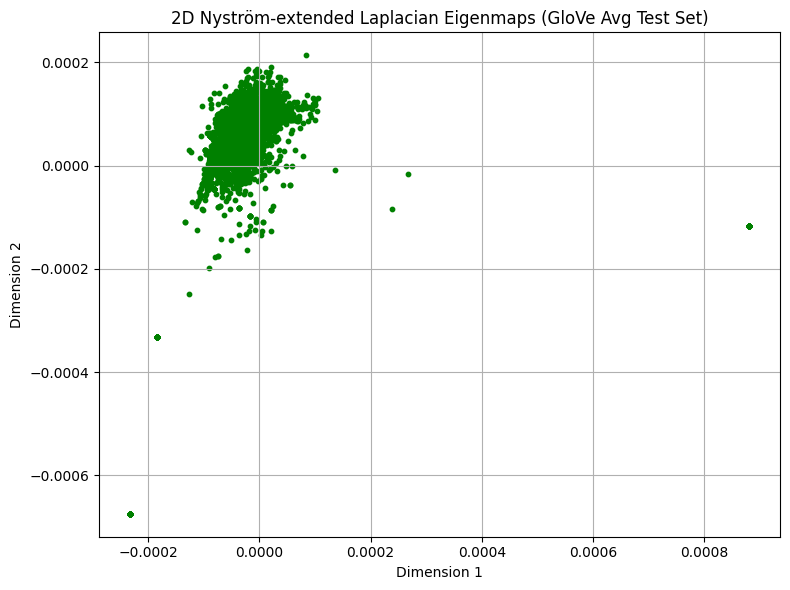

In [ ]:
# GLOVE SIMPLE AVG TEST SET W/ DUPLICATES
# plt.figure(figsize=(8, 6))
# plt.scatter(Z_test[:, 0], Z_test[:, 1], s=10, c='green')
# plt.title("2D Nyström-extended Laplacian Eigenmaps (GloVe Avg TEST Set)")
# plt.xlabel("Dimension 1")
# plt.ylabel("Dimension 2")
# plt.grid(True)
# plt.tight_layout()
# #plt.savefig("laplacian_embedding_test.png")
# plt.show()



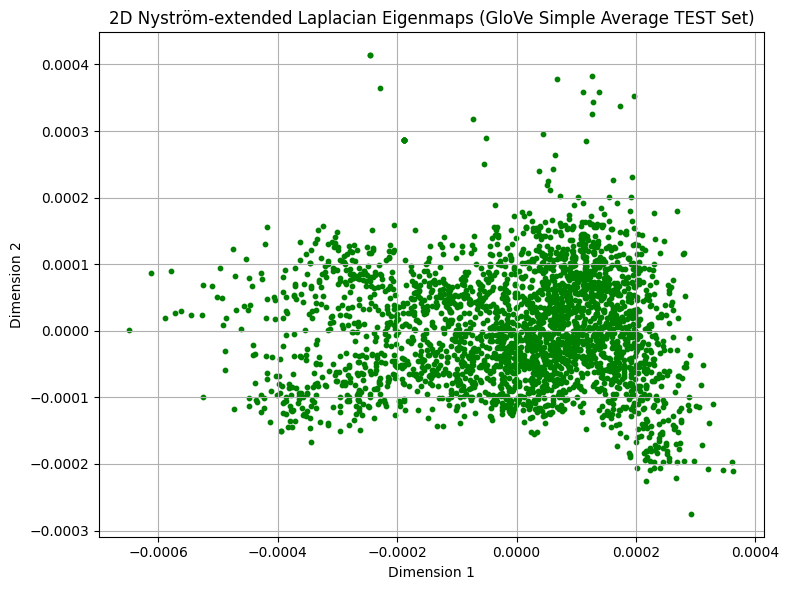

In [ ]:
# GLOVE Simple AVG TEST Set W/O DUPLICATES
plt.figure(figsize=(8, 6))
plt.scatter(Z_test[:, 0], Z_test[:, 1], s=10, c='green')
plt.title("2D Nyström-extended Laplacian Eigenmaps (GloVe Simple Average TEST Set)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("lapl_SIMPLE_embedding_test.png")
plt.show()

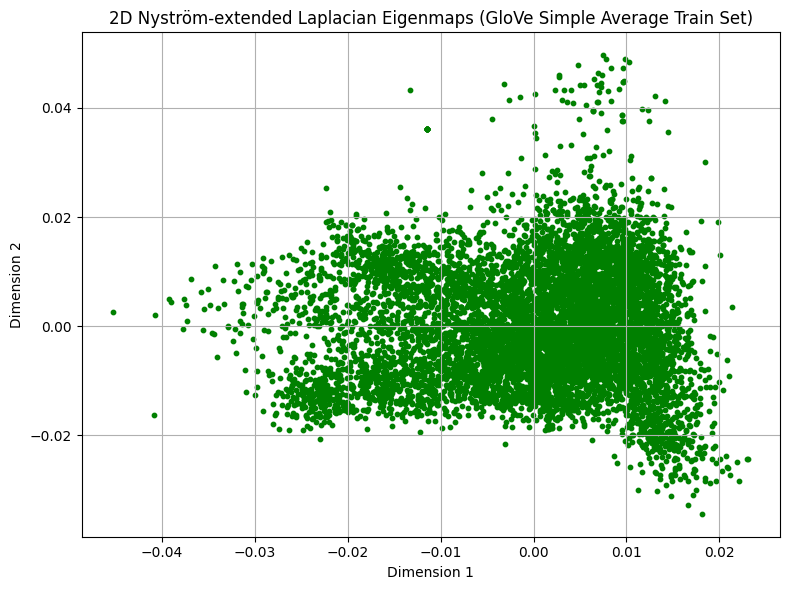

In [ ]:
# GLOVE Simple AVG Train Set W/O DUPLICATES
plt.figure(figsize=(8, 6))
plt.scatter(Z_train[:, 0], Z_train[:, 1], s=10, c='green')
plt.title("2D Nyström-extended Laplacian Eigenmaps (GloVe Simple Average Train Set)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("lapl_SIMPLE_embedding_train.png")
plt.show()

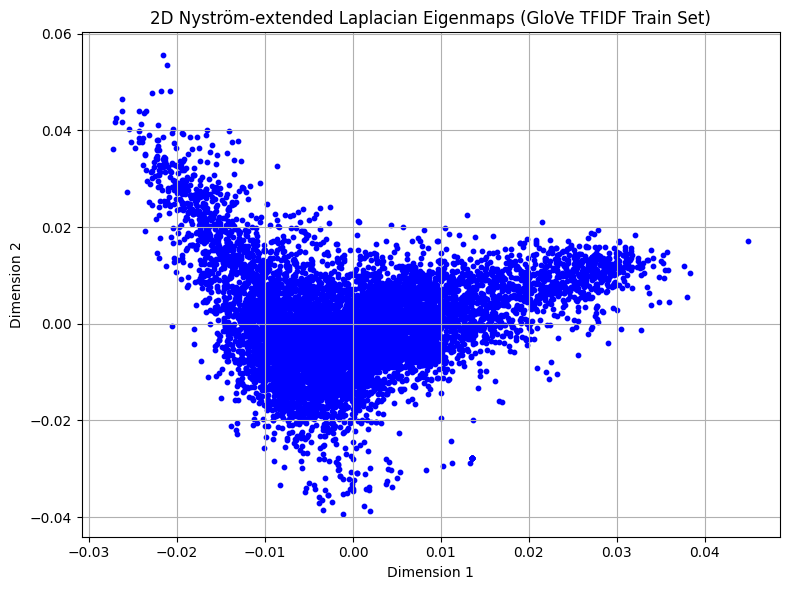

In [ ]:
# GloVe TFIDF TRAIN Set W/O DUPLICATES
plt.figure(figsize=(8, 6))
plt.scatter(Z_train[:, 0], Z_train[:, 1], s=10, c='blue')
plt.title("2D Nyström-extended Laplacian Eigenmaps (GloVe TFIDF Train Set)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("lapl_tfidf_embedding_train.png")
plt.show()

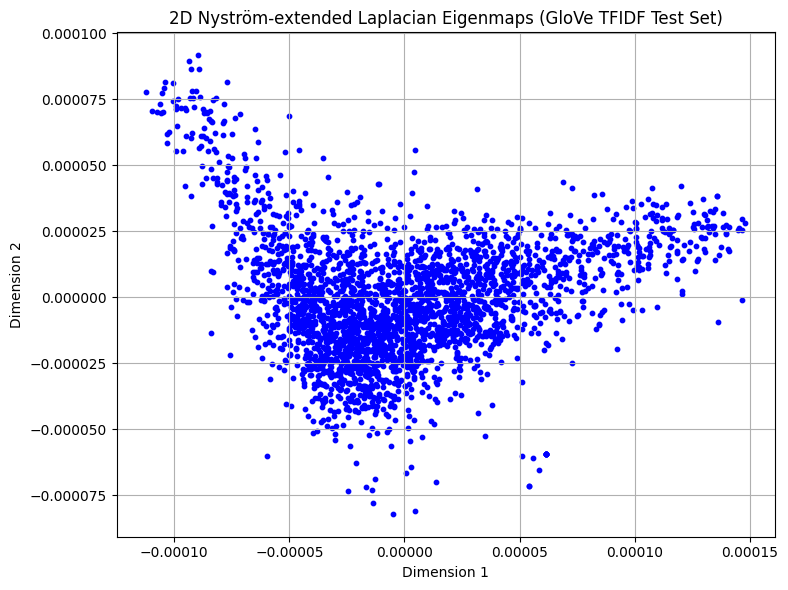

In [ ]:
# GloVe TFIDF TEST Set
plt.figure(figsize=(8, 6))
plt.scatter(Z_test[:, 0], Z_test[:, 1], s=10, c='blue')
plt.title("2D Nyström-extended Laplacian Eigenmaps (GloVe TFIDF Test Set)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("lapl_tfidf_embedding_test.png")
plt.show()

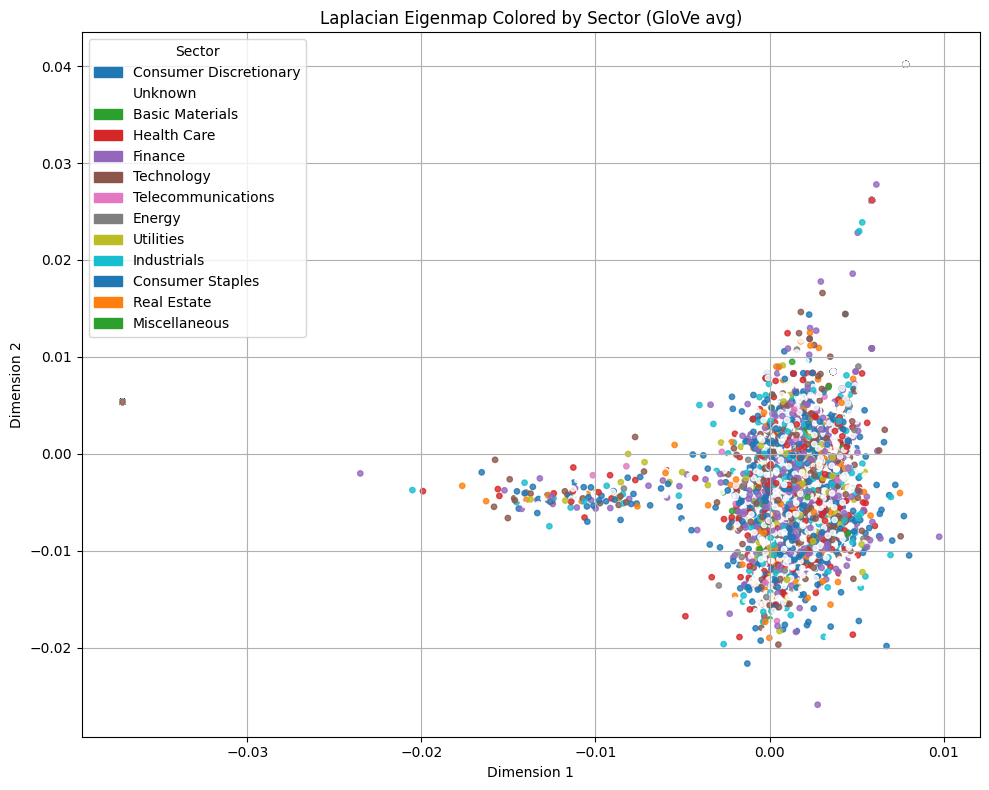

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

meta_df = pd.read_csv("/content/drive/MyDrive/AMTH 232 Final project/BoW, GloVe Matrices/OG_data_with_sector_without_NA")
meta_df = meta_df.head(10000)

# Make sure 'Sector' is a string and fill NaNs with 'Unknown'
meta_df["Sector"] = meta_df["Sector"].fillna("Unknown").astype(str)

# Define a color palette (e.g., 10–15 distinct colors + gray for unknowns)
unique_sectors = meta_df["Sector"].unique()
palette = sns.color_palette("tab10", len(unique_sectors))  # you can use 'Set2' or others
sector_color_map = dict(zip(unique_sectors, palette))
sector_color_map["Unknown"] = "white"  # override if needed

# Map sectors to colors
sector_colors = meta_df["Sector"].map(sector_color_map)

plt.figure(figsize=(10, 8))
plt.scatter(Z_train[:, 0], Z_train[:, 1], c=sector_colors, s=15, alpha=0.8)
plt.title("Laplacian Eigenmap Colored by Sector (GloVe avg)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.tight_layout()

legend_handles = [
    mpatches.Patch(color=sector_color_map[sector], label=sector)
    for sector in unique_sectors
]
plt.legend(handles=legend_handles, title="Sector", loc='best')  # ← Changed this line
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar

# Get the Day1_Return values
returns = meta_df["Day1_Return"].values

vmin = np.percentile(returns, 10)   # 5th percentile
vmax = np.percentile(returns, 90)  # 95th percentile

# Create the scatter plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(Z_train[:, 0], Z_train[:, 1],
                 c=returns, cmap='viridis', s=15, alpha=0.8,
                 vmin=vmin, vmax=vmax)


plt.title("Laplacian Eigenmap Colored by Day-1 Return (GloVe tfidf)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.colorbar(sc, label="Day-1 Return")  # Adds a color scale legend
plt.tight_layout()
plt.show()


NameError: name 'meta_df' is not defined

In [ ]:
import pandas as pd
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
from scipy.sparse import csgraph
from scipy.spatial.distance import cdist


# Load CSV
data = pd.read_csv("glove_train_tfidf.csv")
data = data.head(10000)

# Dimension reduce using PCA (10 components)
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(data)

# define X_train
X_train = reduced_data

# defining some sigma
sigma = sigma = 3 * np.median(cdist(X_train, X_train, metric="euclidean")) # Median distance (do we need to change this)

# adjacency
W = rbf_kernel(X_train, gamma=1.0 / (2 * sigma**2))


# Building degree matrix and normalised lap
D = np.diag(W.sum(axis=1))
L = csgraph.laplacian(W, normed=True)  # symmetric normalized Laplacian


# extracting eigenvalues and eigenvectors
from scipy.sparse.linalg import eigsh

k = 2  # number of dimensions for embedding
eigvals, eigvecs = eigsh(L, k=k+1, which='SM')  # skip the trivial zero eigenvalue
eigvals, eigvecs = eigvals[1:], eigvecs[:, 1:]  # remove first eigenvector (constant)

print(eigvals)
print(eigvecs)

# Nystrom extension

from scipy.spatial.distance import cdist

def nystrom_extension(X_test, X_train, Z_train, lambda_vals, sigma):
    """
    Apply Nyström extension to embed test points into Laplacian Eigenmap space.

    Parameters:
        X_test:       (n_test, d)    PCA-reduced test data
        X_train:      (n_train, d)   PCA-reduced training data
        Z_train:      (n_train, k)   eigenvectors from Laplacian (Z_train)
        lambda_vals:  (k,)           eigenvalues (lambda_1 to lambda_k)
        sigma:        float          bandwidth used in the RBF kernel

    Returns:
        Z_test:       (n_test, k)    estimated embeddings for X_test
    """
    # Step 1: compute pairwise squared distances
    dists = cdist(X_test, X_train, metric="sqeuclidean")  # shape: (n_test, n_train)

    # Step 2: kernel weights to training points
    W_test = np.exp(-dists / (2 * sigma**2))  # shape: (n_test, n_train)

    # Step 3: compute degrees
    d_test = W_test.sum(axis=1, keepdims=True)           # (n_test, 1)
    d_train = np.sum(W_test, axis=0, keepdims=True)      # (1, n_train)

    # Step 4: normalize weights
    W_tilde = W_test / np.sqrt(d_test @ d_train)         # shape: (n_test, n_train)

    # Step 5: compute Z_test via Nyström extension
    Z_test = (W_tilde @ Z_train) / lambda_vals           # (n_test, k) / (k,) — broadcasts

    return Z_test

# testing data
# Load CSV
data_test = pd.read_csv("glove_test_tfidf.csv")
data_test = data_test.head(10000)

# Dimension reduce using PCA (10 components)
pca_test = PCA(n_components=10)
reduced_data_test = pca.fit_transform(data)
print("test PCA complete")

# define X_test
X_test = reduced_data_test


Z_test = nystrom_extension(X_test, X_train, eigvecs, eigvals, sigma)



In [ ]:
import pickle


with open('/content/DJN_2017-01 (1).pkl', 'rb') as f:
    full_data = pickle.load(f)


<ipython-input-18-0ec4c17b2b2d>:5: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  full_data = pickle.load(f)


In [ ]:
print(full_data.head(20))

print(full_data.shape)

        Date     Company                                              Title  \
0   20170101    [ATC.AE]  [press, release, murphy, owner, kxly, abc, cha...   
1   20170101      [ARKR]  [ark, restaurant, apos, ceo, weinstein, result...   
2   20170101         [F]  [like, futurist, be, prepare, totally, unexpec...   
3   20170101      [NCOM]  [press, release, national, commerce, corporati...   
4   20170101       [EDE]  [press, release, district, electric, company, ...   
5   20170101      [SCOR]  [press, release, comscore, report, north, movi...   
6   20170102     [UKDAY]  [morning, brief, manufacturing, pmis, top, age...   
7   20170102  [WRT1V.HE]  [wartsila, wärtsilä, increase, safety, predict...   
8   20170102  [WRT1V.HE]  [press, release, wartsila, wärtsilä, increase,...   
9   20170102      [TWTR]  [late, twitter, exec, depart, great, china, he...   
10  20170102      [CEFC]  [commercial, national, financial, corporation,...   
11  20170102       [ODP]  [press, release, office, d